In [21]:
from dipy.data import get_data
import nibabel as nib
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel
from dipy.reconst.dti import fractional_anisotropy
from dipy.reconst.dti import color_fa

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


In [12]:
def makeColor_fa(fimg, fbval, fbvec):
    img = nib.load(fimg)
    data = img.get_data()

    bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

    gtab = gradient_table(bvals, bvecs)

    ten = TensorModel(gtab)
    tenfit = ten.fit(data)

    fa = fractional_anisotropy(tenfit.evals)
    cfa = color_fa(fa, tenfit.evecs)
    return cfa

In [14]:

fimg='DTI_004.nii.gz'
fbvec='DTI_004.bvec'
fbval='DTI_004.bval'
niixFA = makeColor_fa(fimg, fbval, fbvec)


In [15]:
fimg='DWIDTI_004.nii'
fbvec='DWIDTI_004.bvec'
fbval='DWIDTI_004.bval'
dcmconvertFA = makeColor_fa(fimg, fbval, fbvec)


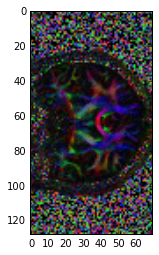

In [29]:
imgplot = plt.imshow(niixFA[:,64,:])

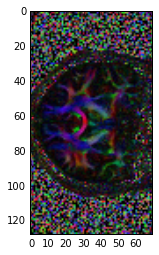

In [28]:
imgplot = plt.imshow(dcmconvertFA[:,64,:])